In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14,
                 'axes.labelsize': 14, 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'ytick.right': True, 'xtick.top':True, 'ytick.major.size': 10, 'xtick.major.size': 10,
                 'legend.fancybox': True, 'legend.markerscale': 0.8, 'legend.handlelength': 5.0})

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

In [3]:
pkl_file = open('../2020-02-21_14-17-51.pkl', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()

dict_keys(['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7'])

In [4]:
print(mydata['Ch4'].shape)   

(9997, 2000)


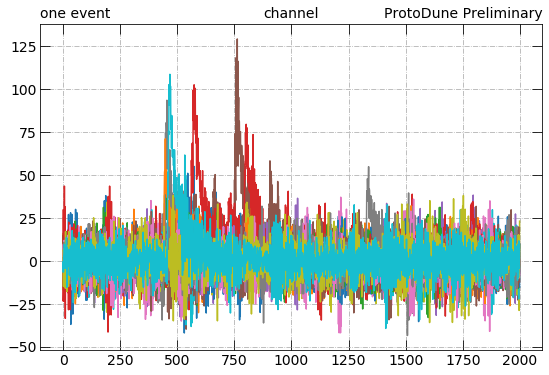

In [5]:
for x in range(20):
    #print(x)
    data=(mydata['Ch4'][x])
    plt.plot((data))
    plt.title('channel')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

plt.show()



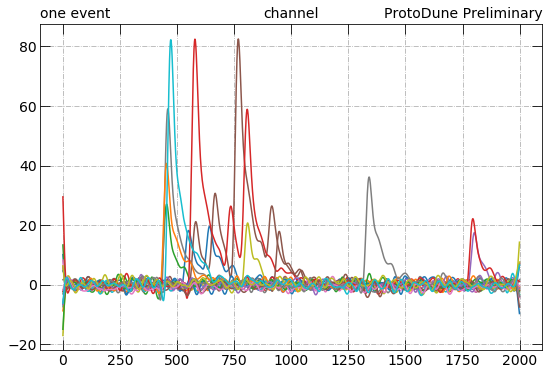

In [6]:
from scipy import signal

for x in range(20):
    #print(x)
    data=(mydata['Ch4'][x])
    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, data, zi=zi*data[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, data)
    plt.plot((y))
    plt.title('channel')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

plt.show()

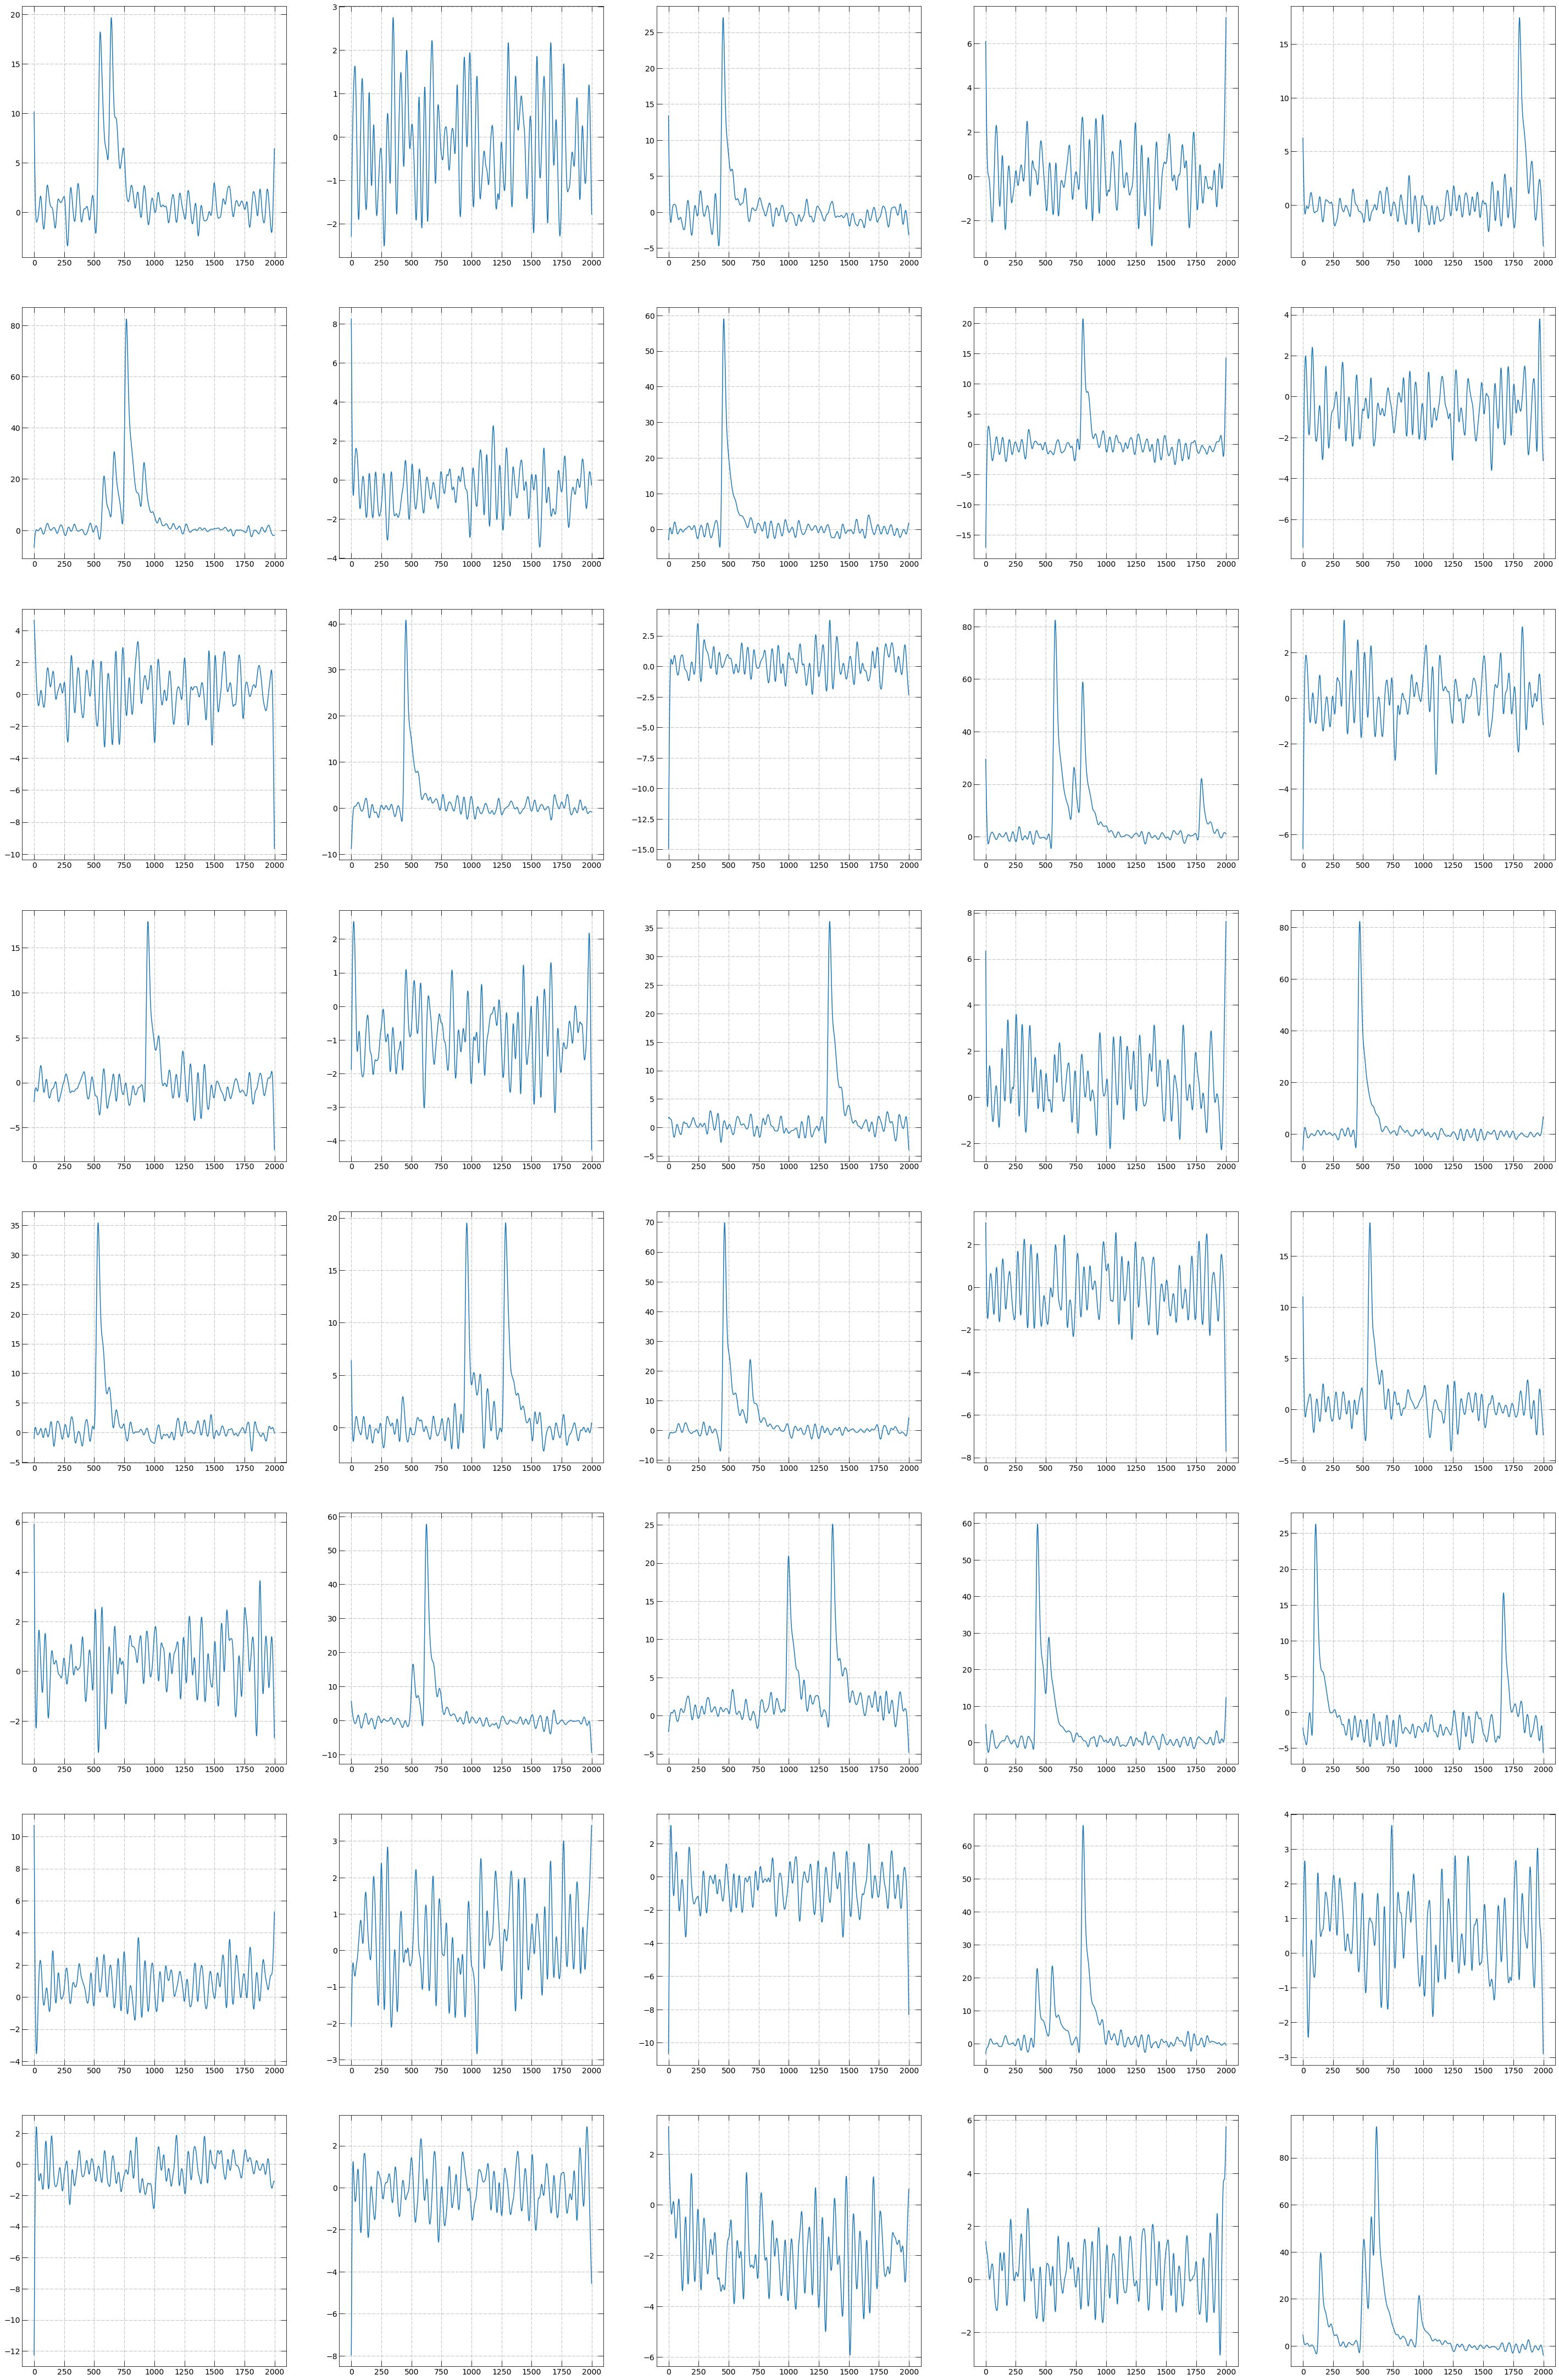

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

nrows, ncols = 20, 5

fig = plt.figure(figsize=(50,200))    
for i in range(1,41):
    ax = fig.add_subplot(nrows, ncols, i)
    data=mydata['Ch4'][i-1]

    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, data, zi=zi*data[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, data)    

    ax.plot(y)

plt.show()

In [8]:
from scipy import stats

pkl_file = open('../2020-02-21_14-17-51.pkl', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()

linreg_array = np.array([])
arr=mydata['Ch4']

for row in arr[:,:250]:
    y = row
    #print(y.shape)
    x = np.arange(len(row))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)
    mask=[trend < 0.001 ]
    
    linreg_array = np.append(linreg_array, mask, axis=0)
    linreg_array=linreg_array > 0
    #print(mask)
    #print(trend)
    #plt.plot(row)
eventSel=arr[linreg_array]
print(eventSel.shape)

linreg_array2 = np.array([])
for row in eventSel[:,1400:2000]:
    y = row
    #print(y.shape)
    x = np.arange(len(row))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)
    
    mask=[trend < 0.01 ]
    
    linreg_array2 = np.append(linreg_array2, mask, axis=0)
    linreg_array2 = linreg_array2 > 0
    #print(mask)
    #print(trend)
    #plt.plot(row)
test=eventSel[linreg_array2]
print(test.shape)



(2040, 2000)
(1887, 2000)


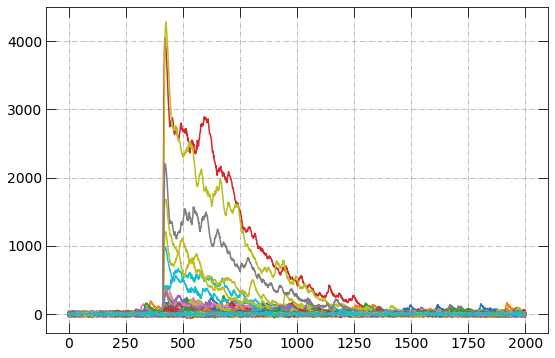

In [10]:
baseline = eventSel[0:eventSel.size, 0:100].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = eventSel-blines
clean.shape
for row in clean:
    #plt.ylim(14000,15000)

    plt.plot(row)
    #print(row)
    #gauss=gaussian_filter(row, sigma=1)

    #plt.plot(gauss)

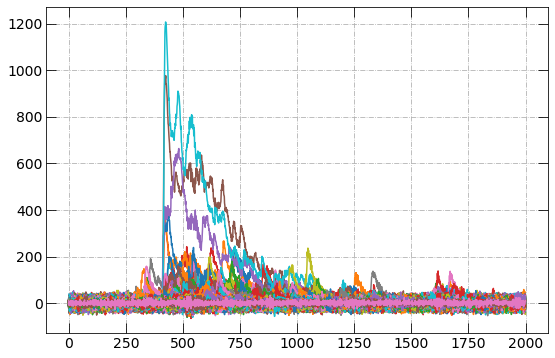

In [11]:
baseline = test[0:test.size, 0:100].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = test-blines
clean.shape
for row in clean:
    #plt.ylim(-10000,10000)

    plt.plot(row)
    #print(row)
    #gauss=gaussian_filter(row, sigma=1)

    #plt.plot(gauss)

In [12]:
from scipy import stats

pkl_file = open('../2020-02-21_14-17-51.pkl', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()
dict_s = {}
#arr=mydata['Ch1']
for key, value in mydata.items():
        linreg_array = np.array([])
        for row in mydata[key][:,:250]:
            y = row
            x = np.arange(len(row))

            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            trend = np.absolute(slope)
            mask = [trend < 0.001]

            linreg_array = np.append(linreg_array, mask, axis=0)
            linreg_array=linreg_array > 0
            # print(mask)
            # print(trend)
            # plt.plot(row)
        eventSel=arr[linreg_array]
        print(eventSel.shape)
        
        linreg_array2 = np.array([])
        for row in eventSel[:,1400:2000]:
            y = row
            #print(y.shape)
            x = np.arange(len(row))

            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            trend=np.absolute(slope)

            mask=[trend < 0.001 ]

            linreg_array2 = np.append(linreg_array2, mask, axis=0)
            linreg_array2 = linreg_array2 > 0
            #print(mask)
            #print(trend)
            #plt.plot(row)
        test=eventSel[linreg_array2]
        print(test.shape)


        baseline = eventSel[0:eventSel.size, 0:100].mean(axis=1)
        blines = baseline.reshape(baseline.size, 1)
        clean = eventSel-blines
        data = clean.mean(axis=0)
        dict_s.update({key: data})

IndexError: boolean index did not match indexed array along dimension 0; dimension is 9997 but corresponding boolean dimension is 9995

In [ ]:
dict_s

No handles with labels found to put in legend.


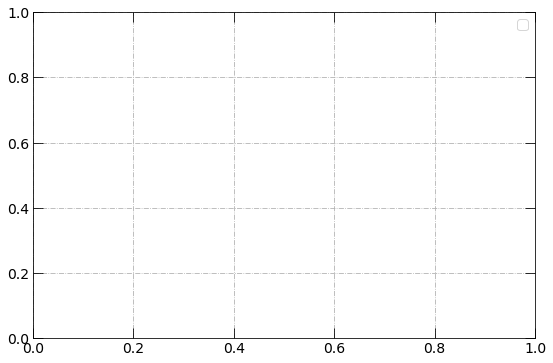

In [13]:
for key, value in dict_s.items():
    b, a = signal.butter(3, 0.05)
    
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, value, zi=zi*data[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    z3, _ = signal.lfilter(b, a, z2, zi=zi*z[0])
    z4, _ = signal.lfilter(b, a, z3, zi=zi*z[0])
    y = signal.filtfilt(b, a, value)    
    
    xtime=range(1, len(z) + 1),
    plt.plot(z, label=key, linewidth=2)
#plt.title('RUN_'+str(os.path.splitext(filename)[0]))
plt.grid(True)
plt.legend() 
#plt.yscale('log')
#plt.ylim(1,100)

plot_path = os.path.abspath('run_filt') 
plt.show()    